# Action1	

选择任意一张图片，对其进行灰度化，然后使用SVD进行图像的重构，当奇异值数量为原有的1%，10%，50%时，输出重构后的图像			

1、完成代码，结果正确（10points）!


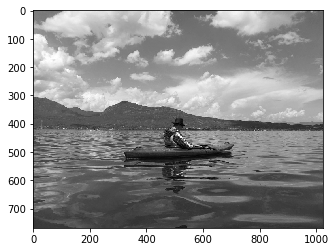

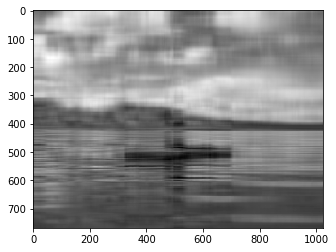

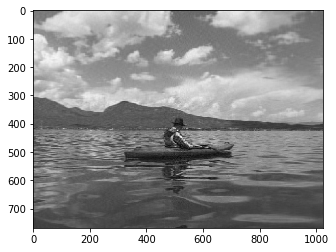

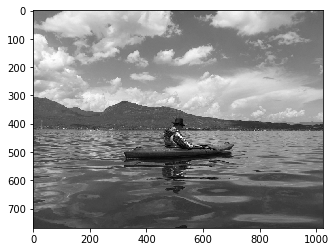

In [18]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
    # 对于S，只保留前K个特征值
    s_temp = np.zeros(s.shape[0])
    s_temp[0:k] = s[0:k]
    s = s_temp * np.identity(s.shape[0])
    # 用新的s_temp，以及p,q重构A
    temp = np.dot(p,s)
    temp = np.dot(temp,q)
    plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()
    #print(A-temp)


# 加载256色图片
image = Image.open('./ljsb.jpeg') 
A = np.array(image)[:,:,1]
# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()

n=min(A.shape)
# 对图像矩阵A进行奇异值分解，得到p,s,q
p,s,q = svd(A, full_matrices=False)
# 取前k个特征，对图像进行还原
get_image_feature(s, round(n/100))
get_image_feature(s, round(n/10))
get_image_feature(s, round(n/2))

# Action2

使用Google Colab编辑器，对MovieLens数据集进行评分预测，计算RMSE（使用funkSVD, BiasSVD，SVD++）			

"1、使用Colab完成3种算法在MovieLens的评分预测（20points）

2、使用Surprise以外的工具(+5points)"

In [110]:
#!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
     |████████████████████████████████| 11.8 MB 1.2 MB/s eta 0:00:01
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-macosx_10_7_x86_64.whl size=799529 sha256=fb60c9c666154dc4b5b2d45e528d8c780bbca5fe371b0aadf129c5a47e8b8aa3
  Stored in directory: /Users/Leigh/Library/Caches/pip/wheels/de/9a/41/6a57bf37eb7b50de7f8c7ca9d7053bebe0ea7c7c9bae9fa293
Successfully built scikit-surprise
You should consider upgrading via the '/Users/Leigh/anaconda3/bin/python -m pip install --upgrade pip' command.


In [112]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
import pandas as pd
import time

"""
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")
"""

# 数据读取
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('ratings.csv', reader=reader)
train_set = data.build_full_trainset()

# 使用funkSVD
algo = SVD(biased=False)

# 定义K折交叉验证迭代器，K=3
kf = KFold(n_splits=3)
for trainset, testset in kf.split(data):
    # 训练并预测
    algo.fit(trainset)
    predictions = algo.test(testset)
    # 计算RMSE
    accuracy.rmse(predictions, verbose=True)

uid = str(196)
iid = str(302)
# 输出uid对iid的预测结果
pred = algo.predict(uid, iid, r_ui=4, verbose=True)


RMSE: 0.8727
RMSE: 0.8718
RMSE: 0.8723
user: 196        item: 302        r_ui = 4.00   est = 3.95   {'was_impossible': False}


In [113]:
# 使用BiasedSVD
algo = SVD(biased=True)

# 定义K折交叉验证迭代器，K=3
kf = KFold(n_splits=3)
for trainset, testset in kf.split(data):
    # 训练并预测
    algo.fit(trainset)
    predictions = algo.test(testset)
    # 计算RMSE
    accuracy.rmse(predictions, verbose=True)

uid = str(196)
iid = str(302)
# 输出uid对iid的预测结果
pred = algo.predict(uid, iid, r_ui=4, verbose=True)

RMSE: 0.8464
RMSE: 0.8446
RMSE: 0.8474
user: 196        item: 302        r_ui = 4.00   est = 4.20   {'was_impossible': False}


In [116]:
from surprise import SVDpp

# 使用SVD++
algo = SVDpp(n_factors=30)

# 定义K折交叉验证迭代器，K=3
kf = KFold(n_splits=3)
for trainset, testset in kf.split(data):
    # 训练并预测
    algo.fit(trainset)
    predictions = algo.test(testset)
    # 计算RMSE
    accuracy.rmse(predictions, verbose=True)

uid = str(196)
iid = str(302)
# 输出uid对iid的预测结果
pred = algo.predict(uid, iid, r_ui=4, verbose=True)

RMSE: 0.8283
RMSE: 0.8317
RMSE: 0.8346
user: 196        item: 302        r_ui = 4.00   est = 3.89   {'was_impossible': False}


# Action3	

"使用Gensim中的Word2Vec对三国演义进行Word Embedding，分析和曹操最相近的词有哪些，曹操+刘备-张飞=?
数据集：three_kingdoms.txt"			

1、完成代码，结果正确（20points）!

In [45]:
#!pip install jieba
#!pip install utils

You should consider upgrading via the '/Users/Leigh/anaconda3/bin/python -m pip install --upgrade pip' command.


In [86]:
# 对txt文件进行中文分词
import jieba
import os
from utils import files_processing

# 源文件所在目录 journey_to_the_west three_kingdoms
source_folder = './three_kingdoms/source'
segment_folder = './three_kingdoms/segment'

# 字词分割，对整个文件内容进行字词分割
def segment_lines(file_list,segment_out_dir,stopwords=[]):
    for i,file in enumerate(file_list):
        segment_out_name=os.path.join(segment_out_dir,'segment_{}.txt'.format(i))
        with open(file, 'rb') as f:
            document = f.read()
            document_cut = jieba.cut(document)
            sentence_segment=[]
            for word in document_cut:
                if word not in stopwords:
                    sentence_segment.append(word)
            result = ' '.join(sentence_segment)
            result = result.encode('utf-8')
            with open(segment_out_name, 'wb') as f2:
                f2.write(result)

                

# 对source中的txt文件进行分词，输出到segment目录中
file_list=files_processing.get_files_list(source_folder, postfix='*.txt')
segment_lines(file_list, segment_folder)

In [100]:
from gensim.models import word2vec
import multiprocessing
import warnings
warnings.filterwarnings("ignore")

# 如果目录中有多个文件，可以使用PathLineSentences
segment_folder = './three_kingdoms/segment'
sentences = word2vec.PathLineSentences(segment_folder)

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = word2vec.Text8Corpus(u"./three_kingdoms/segment/segment_0.txt")

# 设置模型参数，进行训练
model = word2vec.Word2Vec(sentences, size=100, window=3, min_count=1)

print(model.wv.similarity('曹操', '刘备'))
print(model.wv.most_similar(positive=['曹操', '刘备'], negative=['张飞']))

# 设置模型参数，进行训练
model2 = word2vec.Word2Vec(sentences, size=128, window=5, min_count=5, workers=multiprocessing.cpu_count())

# 保存模型
model2.save('./word2Vec.model')
print(model2.wv.similarity('曹操', '刘备'))
print(model2.wv.most_similar(positive=['曹操', '刘备'], negative=['张飞']))


2020-09-18 01:57:20,111 : INFO : reading directory ./three_kingdoms/segment/
2020-09-18 01:57:20,113 : INFO : files read into PathLineSentences:./three_kingdoms/segment/.DS_Store
./three_kingdoms/segment/segment_0.txt
2020-09-18 01:57:20,119 : INFO : collecting all words and their counts
2020-09-18 01:57:20,141 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-09-18 01:57:20,308 : INFO : collected 49284 word types from a corpus of 394235 raw words and 40 sentences
2020-09-18 01:57:20,308 : INFO : Loading a fresh vocabulary
2020-09-18 01:57:20,440 : INFO : effective_min_count=1 retains 49284 unique words (100% of original 49284, drops 0)
2020-09-18 01:57:20,441 : INFO : effective_min_count=1 leaves 394235 word corpus (100% of original 394235, drops 0)
2020-09-18 01:57:20,612 : INFO : deleting the raw counts dictionary of 49284 items
2020-09-18 01:57:20,613 : INFO : sample=0.001 downsamples 26 most-common words
2020-09-18 01:57:20,616 : INFO : downsampling l

0.9719404
[('主公', 0.9966694116592407), ('既', 0.9961142539978027), ('不然', 0.9959011673927307), ('泣', 0.9956048727035522), ('佯', 0.9950959086418152), ('丞相', 0.9945951700210571), ('卿', 0.9930763244628906), ('笑', 0.9922510385513306), ('此', 0.9920232892036438), ('非', 0.9920121431350708)]


2020-09-18 01:57:23,008 : INFO : Loading a fresh vocabulary
2020-09-18 01:57:23,039 : INFO : effective_min_count=5 retains 7576 unique words (15% of original 49284, drops 41708)
2020-09-18 01:57:23,040 : INFO : effective_min_count=5 leaves 334390 word corpus (84% of original 394235, drops 59845)
2020-09-18 01:57:23,061 : INFO : deleting the raw counts dictionary of 49284 items
2020-09-18 01:57:23,065 : INFO : sample=0.001 downsamples 31 most-common words
2020-09-18 01:57:23,066 : INFO : downsampling leaves estimated 231123 word corpus (69.1% of prior 334390)
2020-09-18 01:57:23,084 : INFO : estimated required memory for 7576 words and 128 dimensions: 11545824 bytes
2020-09-18 01:57:23,085 : INFO : resetting layer weights
2020-09-18 01:57:23,182 : INFO : training model with 4 workers on 7576 vocabulary and 128 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-09-18 01:57:23,430 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-09-18 01:57:23,438 : INF

0.80577433
[('丞相', 0.994666337966919), ('叹', 0.9906137585639954), ('臣', 0.988636314868927), ('何人', 0.9878320693969727), ('主公', 0.9870529174804688), ('此', 0.9870246648788452), ('吾', 0.9864177107810974), ('逊笑', 0.9853209257125854), ('非', 0.9847490191459656), ('朕', 0.9838786125183105)]


In [107]:
y = model2.most_similar(u"曹操", topn=20)  # 20个最相关的
print (u"和【曹操】最相关的词有：\n")
for item in y:
    print(item[0], item[1])
print ("--------\n")

和【曹操】最相关的词有：

先主 0.9883769750595093
孙权 0.9842690229415894
众将 0.9839975833892822
慈 0.9818771481513977
书 0.9818141460418701
鲁肃 0.9812672138214111
子龙 0.9809480905532837
报 0.9780802130699158
超 0.978072464466095
回报 0.9775995016098022
袁绍处 0.9761554598808289
泣 0.9750602841377258
平定 0.9736968278884888
睁目 0.9734711647033691
仁 0.9729322791099548
自去 0.9728849530220032
跪 0.9724764823913574
周善 0.9722707271575928
哂笑 0.9719210863113403
那里 0.971869170665741
--------



In [108]:
print(model2.wv.most_similar(positive=['曹操', '刘备'], negative=['张飞']))

[('丞相', 0.994666337966919), ('叹', 0.9906137585639954), ('臣', 0.988636314868927), ('何人', 0.9878320693969727), ('主公', 0.9870529174804688), ('此', 0.9870246648788452), ('吾', 0.9864177107810974), ('逊笑', 0.9853209257125854), ('非', 0.9847490191459656), ('朕', 0.9838786125183105)]
